Trabalho realizado para a matéria de Projeto de Bancos de Dados Nao Relacionais da Fatec-SJC pelos alunos:

- Jessica Helen Helbusto Rosado
- Marcelo Fernando de Souza Teixeira

Neste relatório analisaremos as diferenças de novos candidatos entre partidos no espectro de esquerda e direita nas eleições de 2020, nos quesitos de:
 - Porcentagem de cada raça
 - Porcentagem de cada gênero
 - Valor médio gasto nas campanhas
    
A divisão de partidos entre cada espectro foi feita de acordo com os dados da matéria da BBC [Direita ou esquerda? Análise de votações indica posição de partidos brasileiros no espectro ideológico](https://www.bbc.com/portuguese/brasil-41058120). Partidos criados a partir de 2017 foram categorizados no espectro político em que se declaram.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

filename = r'C:\Users\Jessica\Downloads\consulta_cand_2020\consulta_cand_2020_BRASIL.csv'

df = pd.read_csv(filename, delimiter=';', 
                 usecols='DS_SITUACAO_CANDIDATURA SG_PARTIDO DS_GENERO DS_COR_RACA VR_DESPESA_MAX_CAMPANHA ST_REELEICAO SG_UF VR_DESPESA_MAX_CAMPANHA'.split(),
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
centro_oeste = ['GO', 'MT', 'MS', 'DF']
sudeste = ['SP', 'MG', 'RJ', 'ES']
sul = ['PR', 'SC', 'RS']

partidos_esquerda = ['PDT', 'AVANTE', 'PC DO B', 'PT', 'PROS', 'PSB', 'REDE', 'PSOL', 'CIDADANIA', 'PCB', 'PCO', 'PSTU', 'SOLIDARIEDADE', 'UP']
partidos_direita = ['PSL', 'PRP', 'REPUBLICANOS', 'MDB', 'PTB', 'PP', 'DEM', 'SD', 'PSD', 'PHS', 'PL', 'PODE', 'PSC', 'PSDB', 'PATRIOTA', 'PV', 'DC', 'NOVO', 'PMB', 'PMN', 'PRTB', 'PTC']


def gerar_dict_grafico(valor, colunas, partidos, regiao):
    df_grafico = df.query('DS_SITUACAO_CANDIDATURA == "APTO" and SG_UF in @regiao and SG_PARTIDO in @partidos and ST_REELEICAO == "N"')
    if colunas == "Raças":
        return gerar_dict_porcentual(dict(df_grafico.groupby('DS_COR_RACA').size().sort_values()))
    if colunas == "Gênero":
        return gerar_dict_porcentual(dict(df_grafico.groupby('DS_GENERO').size().sort_values()))
    if valor == "Valor Médio de Campanha":
        return dict(df_grafico.groupby('SG_UF').mean()['VR_DESPESA_MAX_CAMPANHA'].round(2))

def gerar_dict_porcentual(dict_valor_absoluto):
    total_valores = sum(dict_valor_absoluto.values())
    dict_porc = dict()
    for coluna in dict_valor_absoluto.keys():
        dict_porc[coluna] = round((dict_valor_absoluto[coluna]/total_valores)*100, 2)
    return dict_porc

def gerar_valores_barras(barras, ax, adc_porcentagem):
    porcentagem = '%' if adc_porcentagem else ''
    for barra in barras:
        height = barra.get_height()
        ax.annotate(('{}'+porcentagem).format(height),xy=(barra.get_x() + barra.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points",ha='center', va='bottom')

def gerar_grafico_esq_dir(nome_valor, nome_colunas, nome_regiao, regiao, adc_porcentagem):    
    dict_esquerda = gerar_dict_grafico(nome_valor, nome_colunas, partidos_esquerda, regiao)
    dict_direita = gerar_dict_grafico(nome_valor, nome_colunas, partidos_direita, regiao)
    
    list_colunas = dict_direita.keys() 
    
    dados_grafico = {'direita': dict_direita.values(), 'esquerda': dict_esquerda.values()}
    
    x = np.arange(len(list_colunas)) 
    width = 0.35

    fig, ax = plt.subplots(1,1,figsize=(12,7))
    
    barras_esquerda = ax.bar(x + width/1.90, dados_grafico['esquerda'], width, label='Esquerda', color='#B22222')
    barras_direita = ax.bar(x - width/1.90, dados_grafico['direita'], width, label='Direita', color = '#000080')

    plt.xlabel(nome_colunas,color ='#2C79A0', fontsize=14, ha='center')
    plt.ylabel(nome_valor,color ='#2C79A0', fontsize=14, ha='center')
    
    ax.set_title(f'{nome_valor} por {nome_colunas} em partidos de direita e esquerda na região {nome_regiao}', fontsize=20,color ='#2C79A0')
    ax.set_xticks(x)
    ax.set_xticklabels(list_colunas)
    
    plt.legend(loc=2,prop={'size':13})
    plt.style.use("bmh")
    
    gerar_valores_barras(barras_esquerda, ax, adc_porcentagem)
    gerar_valores_barras(barras_direita, ax, adc_porcentagem)
    plt.show()

Primeiramente será demonstrado em percentual de cada raça entre os novos candidados em cada região do Brasil.

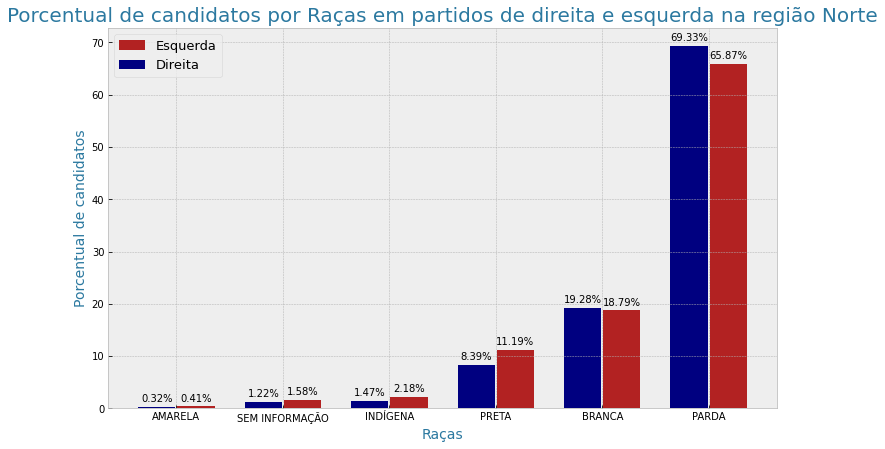

In [18]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Raças", "Norte", norte, True)

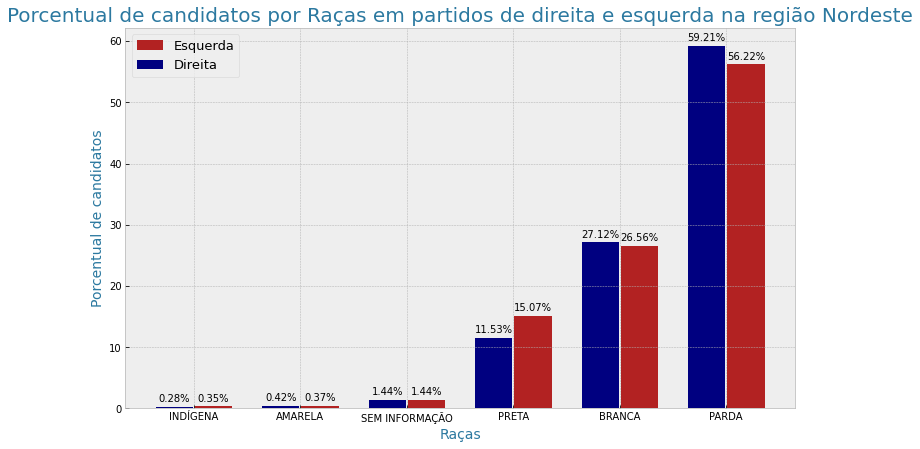

In [19]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Raças", "Nordeste", nordeste, True)

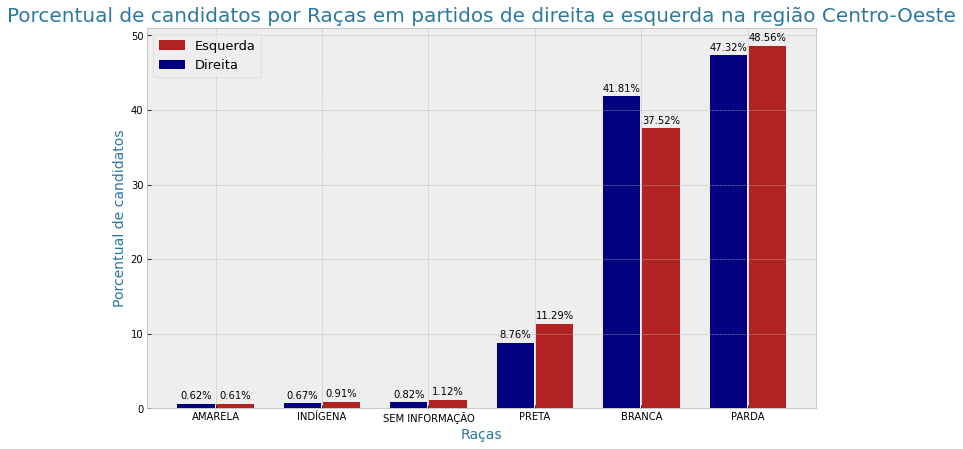

In [20]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Raças", "Centro-Oeste", centro_oeste, True)

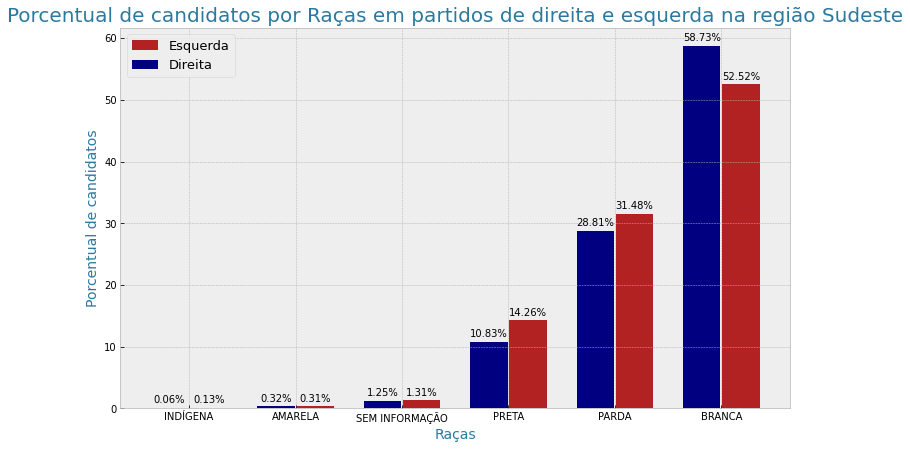

In [21]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Raças", "Sudeste", sudeste, True)

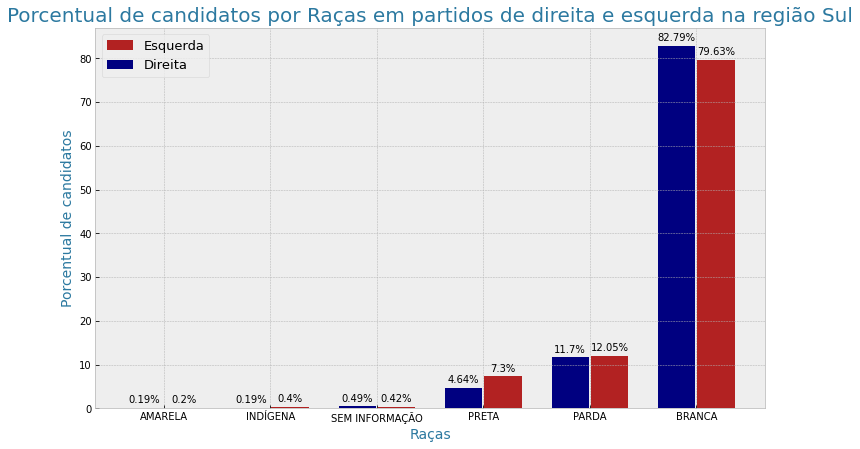

In [22]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Raças", "Sul", sul, True)

A seguir, será demonstrado o porcentual dos gêneros dos novos candidatos em partidos de esquerda e direita por regiões do Brasil. A similaridade dos percentuais está relacionada à necessidade da quantidade mínima de 30% de mulheres para as candidaturas de cada partido.

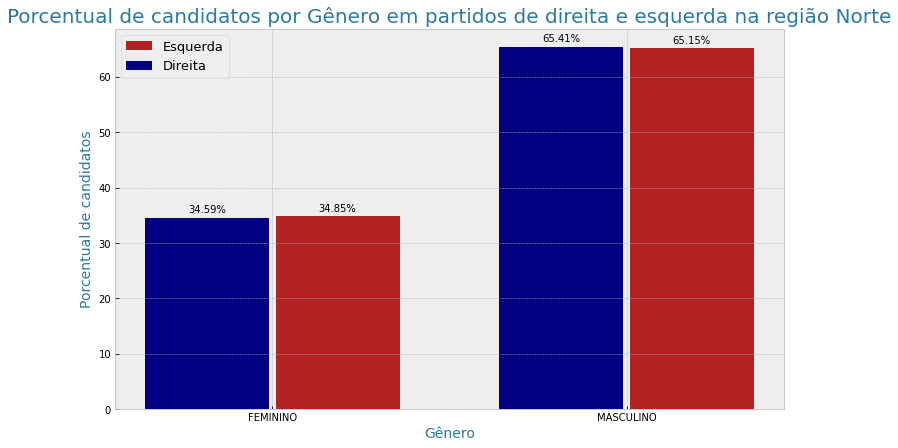

In [23]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Gênero", "Norte", norte, True)

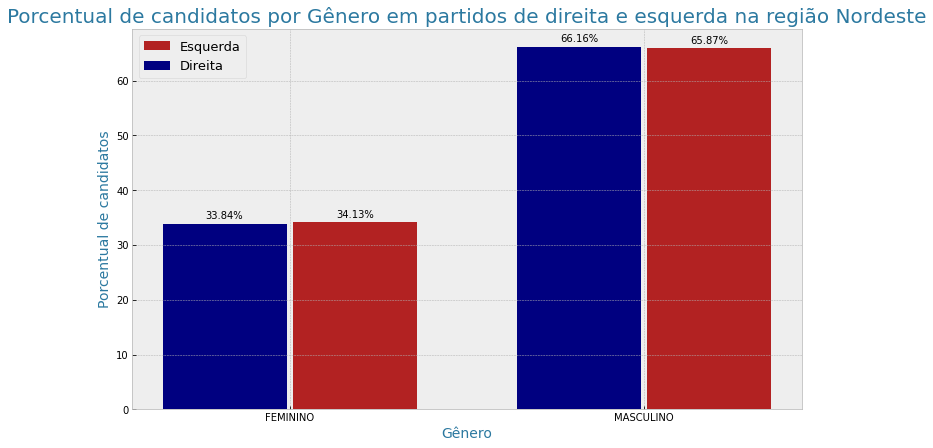

In [24]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Gênero", "Nordeste", nordeste, True)

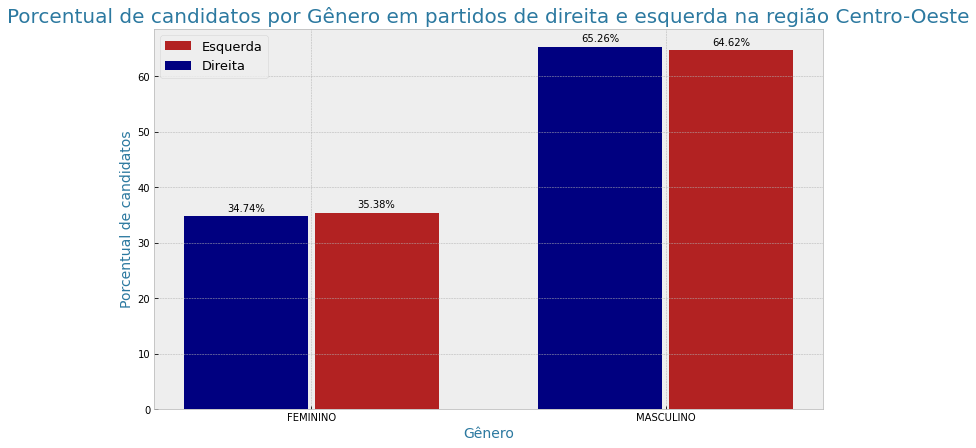

In [25]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Gênero", "Centro-Oeste", centro_oeste, True)

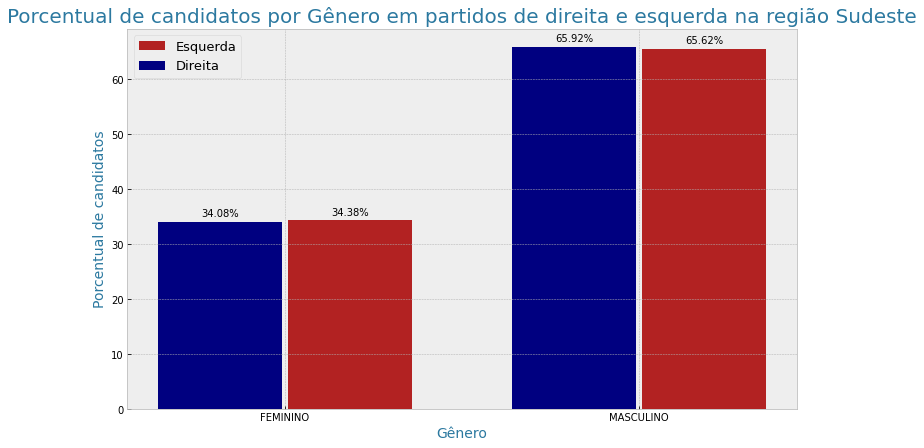

In [26]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Gênero", "Sudeste", sudeste, True)

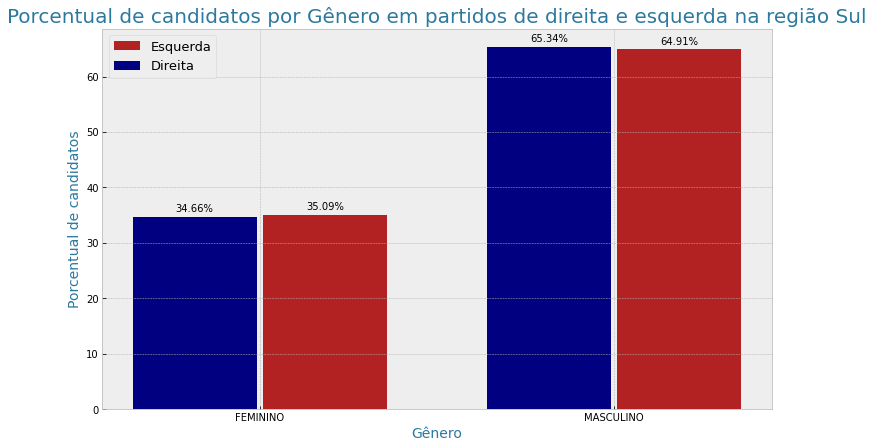

In [27]:
gerar_grafico_esq_dir("Porcentual de candidatos", "Gênero", "Sul", sul, True)

Por fim, será demonstrado o gasto médio dos candidados por estados em partidos de direita e esquerda.

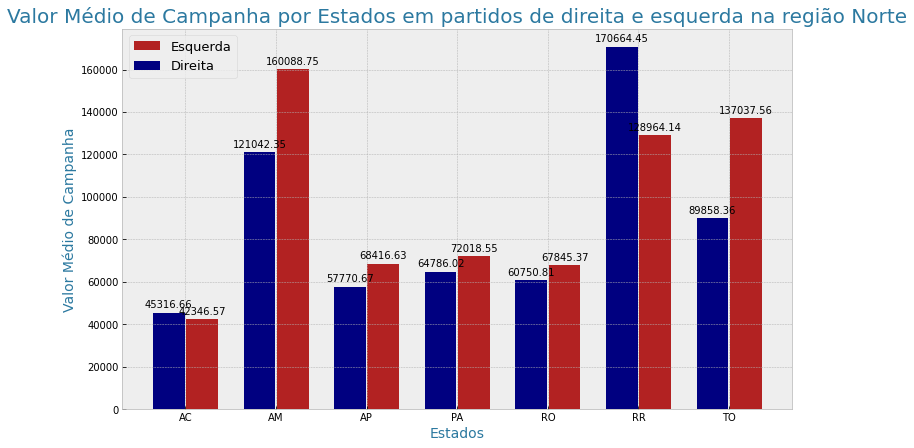

In [28]:
gerar_grafico_esq_dir("Valor Médio de Campanha", "Estados", "Norte", norte, False)

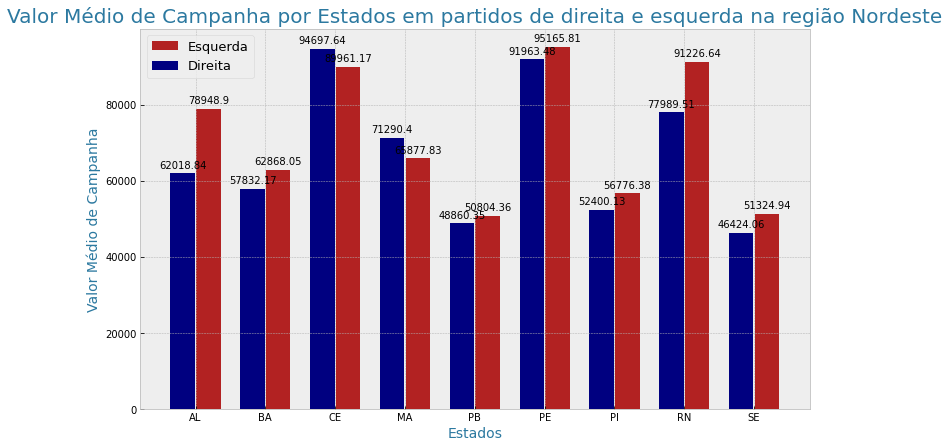

In [29]:
gerar_grafico_esq_dir("Valor Médio de Campanha", "Estados", "Nordeste", nordeste, False)

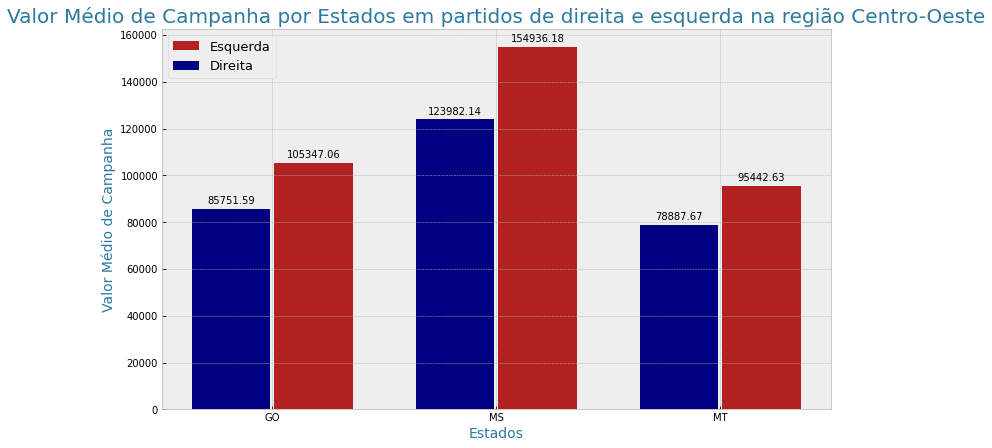

In [30]:
gerar_grafico_esq_dir("Valor Médio de Campanha", "Estados", "Centro-Oeste", centro_oeste, False)

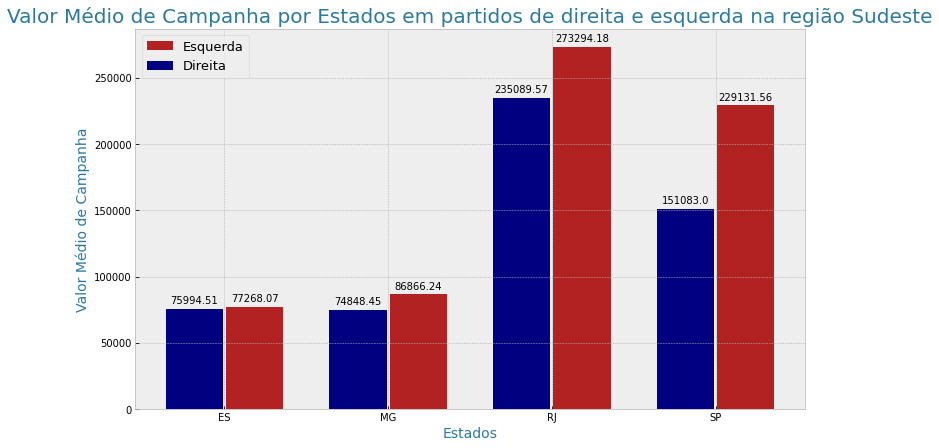

In [31]:
gerar_grafico_esq_dir("Valor Médio de Campanha", "Estados", "Sudeste", sudeste, False)

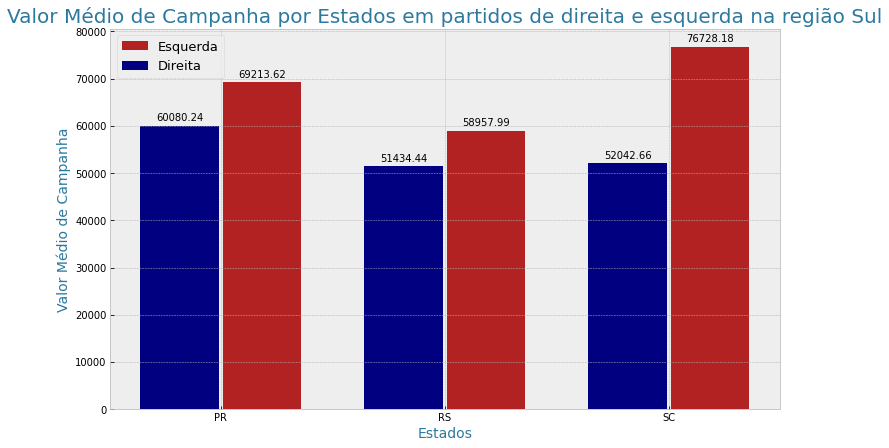

In [32]:
gerar_grafico_esq_dir("Valor Médio de Campanha", "Estados", "Sul", sul, False)